# Clasificación binaria con scikit-learn


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Análisis del dataset Iris


`scikit-learn` incorpora unos [datasets de ejemplo](https://scikit-learn.org/stable/datasets/toy_dataset.html) que podemos utilizar para probar nuestros modelos. En este caso vamos a utilizar el dataset de flores [Iris](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py). Este dataset contiene 150 muestras de 3 especies diferentes de flores del [género Iris](<https://es.wikipedia.org/wiki/Iris_(planta)>) (50 muestras por especie) clasificadas. Para cada muestra se han tomado las medidas de longitud y anchura del sépalo y del pétalo. Tenemos por tanto 4 **características o _features_** (longitud y anchura del sépalo y del pétalo) y la clase (especie de la flor).


In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

Estos datasets son objetos de tipo `Bunch` que contienen los datos y la información de las variables.
Podemos ver la descripción del dataset con el atributo `DESCR` y los nombres de las _features_ con el atributo `feature_names`.


In [4]:
print(type(iris))  # Tipo de objeto

<class 'sklearn.utils._bunch.Bunch'>


In [5]:
print(iris.DESCR)  # Información del dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

El atributo `iris.target` contiene las **etiquetas de las muestras**. En este caso son números enteros que representan las clases de las flores (0, 1 o 2). Para saber qué clase representa cada número podemos consultar el atributo `target_names`.


In [6]:
print(type(iris.target))  # Clases de las flores
print(iris.target_names)  # Nombre de las clases
iris.target  # Clases de las flores

<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Por tanto, tenemos etiquetada cada muestra con la clase a la que pertenece (0 para setosa, 1 para versicolor y 2 para virginica).

El atributo `data` contiene los **datos de las muestras**. Cada muestra es un array de 4 elementos que representan las medidas de longitud y anchura del sépalo y del pétalo. Podemos saber qué _feature_ representan cada elemento del array consultando el atributo `feature_names`.


In [7]:
print(iris.feature_names)  # Datos de las flores
iris.data  # Datos de las flores
type(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


numpy.ndarray

Recapitulando:

- `iris.data` es ndarray bidimensional, donde cada fila contiene la 4 features de cada muestra en un vector de 4 elementos. Estos elementos son respectivamente la longitud del sépalo, la anchura del sépalo, la longitud del pétalo y la anchura del pétalo, todo ello en centímetros, según nos indica el atributo `feature_names`.
- `iris.target` es un array unidimensional que contiene la clase de cada muestra. Cada clase es un número entero que representa una especie de flor: 0 para setosa, 1 para versicolor y 2 para virginica, según nos indica el atributo `target_names`.


Sabiendo esto podemos, por ejemplo, mostrar cómo se [clasifican los datos según la longitud y anchura del sépalo](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#scatter-plot-of-the-iris-dataset):


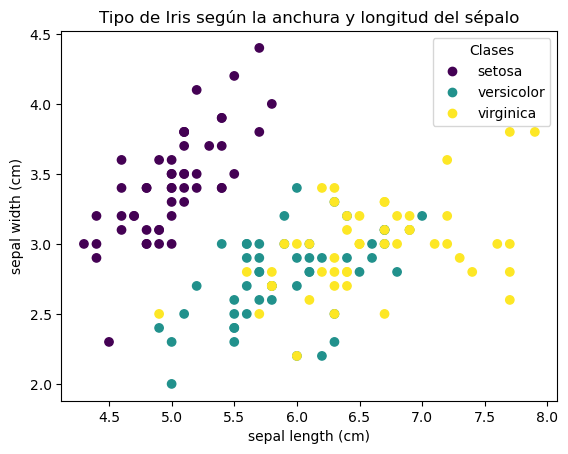

In [8]:
scatter = plt.scatter(
    # Longitud del sépalo en el eje X (array de elementos de la columna 0)
    iris.data[:, 0],
    iris.data[:, 1],   # Ancho del sépalo en el eje Y
    c=iris.target)     # Color en función de las clases de las flores

plt.xlabel(iris.feature_names[0])   # Nombre del eje X
plt.ylabel(iris.feature_names[1])   # Nombre del eje Y
plt.legend(scatter.legend_elements()[0], iris.target_names, title="Clases")
plt.title("Tipo de Iris según la anchura y longitud del sépalo")
plt.show()

## Modelo de clasificación binaria


### Enunciado

TODO: continuar este notebook completando:

- Crea un modelo para clasificar si una flor es de tipo virgínica (`iris.target == 2`) o no lo es (**clasificación binaria**) solo en función de la longitud del pétalo (columna 2 de `iris.data`).
- Representa gráficamente el modelo y los datos de entrenamiento con `matplotlib`.
- Calcula y representa cuál sería la predicción del modelo de que una flor con longitud de pétalo de 5 cm sea de tipo virgínica.

nota

- hay una resolucion paso a paso explicando el código detenidamente, para yo entender lo que estoy haciendo.
- al final del documento, esta el código completo sin explicación.


### Resolución Paso a Paso

### Enlaces de interes

[ejemplos](https://aprendeia.com/machine-learning-clasificador-flor-iris-python/)

### Documentacion

- [numpy.ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html#:~:text=ndarray-,numpy.ndarray,-%23)
  - [numpy.ndarray.reshape](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html)
  - [numpy.ndarray.astype](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html#:~:text=ndarray.astype-,numpy.ndarray.astype,-%23)
- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression:~:text=Vector%20Machines%20Explained-,1.1.11.%20Logistic%20regression,-%C2%B6)
  - [sklearn.linear_model.LogisticRegression <class>](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression:~:text=sklearn.linear_model.LogisticRegression-,sklearn.linear_model.LogisticRegression,-%C2%B6)
  - [sklearn.linear_model.LogisticRegression.fit(X,y)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression:~:text=fit(X%2C%20y%2C,%C2%B6)

#### Definimos `Librerias`

- `numpy` $\rightarrow$ realizar calculos y analisis de grandes volumnes de datos
- `matplotlib.pyplot` $\rightarrow$ representacion grafica del modelo
- `sklearn.linear_model.LogisticRegression` $\rightarrow$ Crear y entrenar el modelo de regresión logística
- `sklearn.datasets` $\rightarrow$ Cagar los datos que vamos a tratar
  - `iris.target` es de tipo `<class 'numpy.ndarray'>`
  - `iris.data` es de tipo `<class 'numpy.ndarray'>`

#### Parar recordar `Atributos de un array` :

Existen varios atributos y funciones que describen las características de un array.

- `a.ndim` : Devuelve el número de dimensiones del array a.
- `a.shape` : Devuelve una tupla con las dimensiones del array a.
- `a.size` : Devuelve el número de elementos del array a.
- `a.dtype`: Devuelve el tipo de datos de los elementos del array a.

#### Parar recordar `<class 'numpy.ndarray'>` $\rightarrow$ `funciones` :

- `numpy.ndarray.shape` :
- [`numpy.ndarray.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.reshape.html) : reorganizamos el array
  - ejemplo a.reshape(1,-1) forzar ==> una fila , n columnas
  - ejemplo a.reshape(-1,1) forzar ==> n fila , una columnas
- [`numpy.ndarray.astype`](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.astype.html#:~:text=ndarray.astype-,numpy.ndarray.astype,-%23) : podemos forzar que todos los elementos de ndarry sean de in tipo ejempo (int, float , float32 , int8 , ...)


In [9]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de iris
iris = load_iris()
print('type(iris.target) ==> ', type(iris.target))
print('type(iris.data) ==> ', type(iris.data))

# debug - arrays
# practica con `numpy.ndarray.reshape`
# nos sera muy util para aplanar un array y ponerlo en una columna o en una fila y forzar a que sean arrays de 2 dimensiones
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
print('\nnumpy.ndarray.reshape\n')
# uso forzar ==> una fila , n columnas
print(
    'uso forzar una fila , n columnas\n\t[arr.reshape(1, -1)]\n', arr.reshape(1, -1), '\n')
# uso forzar ==> n filas , 1 columna
print(
    'uso forzar  n filas , 1 columna\n\t[arr.reshape(-1, 1)]\n', arr.reshape(-1, 1))

type(iris.target) ==>  <class 'numpy.ndarray'>
type(iris.data) ==>  <class 'numpy.ndarray'>

numpy.ndarray.reshape

uso forzar una fila , n columnas
	[arr.reshape(1, -1)]
 [[ 1  2  3  4  5  6  7  8  9 10 11 12]] 

uso forzar  n filas , 1 columna
	[arr.reshape(-1, 1)]
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]]


#### Definimos Eje `X`

- `iris.data` $\rightarrow$ el conjunto de datos
- `[:, 2]` $\rightarrow$ extraemos los datos , `longitud del pétalo` (`columna 2` de `iris.data`).
  - `[:,` $\rightarrow$ de la fila _no_ extraemos datos
  - `2]` $\rightarrow$ de la _columna 2_ extraemos datos
- `.reshape(-1, 1)` $\rightarrow$ forzamos n filas 1 columnas
  - para evitar errores `simpre` que tratemos `x` en LogisticRegression aplicamos `.reshape(-1, 1)`
  - nos asegura que tengamos n filas , 1 columna


In [10]:
# Utilizar solo la longitud del pétalo (columna 2) como característica
# Asegurar que tengamos n filas , 1 columna ,  y que tengamos 2 dimensiones
X = iris.data[:, 2].reshape(-1, 1)

#### Definimos Eje `Y`

- `(iris.target == 2)` $\rightarrow$ clasificar si una flor es de tipo virgínica (`iris.target == 2`) o no lo es
- (**clasificación binaria**) si lo es valor=1 , si no lo es valor=0
- `.astype(int) ` $\rightarrow$ Forzamos a entero, con lo cual :
  - partiendo de la base que los valores entan entre el rango 0-1
  - los valores mas proximos a `0` tomaran `valor=0`
  - los valores mas proximos a `1` tomaran `valor=1`


In [11]:
# Definir la variable y para clasificar si una flor es de tipo virgínica (iris.target == 2) o no lo es como es binaria (0 o 1)
# Convertir a entero para clasificación binaria
y = (iris.target == 2).astype(int)

#### Definimos el `Modelo`

- `LogisticRegression()` $\rightarrow$ instanciamos el modelo de regresión logística
- [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression:~:text=Vector%20Machines%20Explained-,1.1.11.%20Logistic%20regression,-%C2%B6)
- [`sklearn.linear_model.LogisticRegression.fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression:~:text=fit(X%2C%20y%2C,%C2%B6)
- `.fit(x,y) `$\rightarrow$ entrenamos el modelo con los datos

![sklearn-linear_model-LogisticRegression-fit](img/sklearn-linear_model-LogisticRegression-fit.png)

> El método fit(X, y) en la clase LogisticRegression de scikit-learn (sklearn) se utiliza para entrenar un modelo de regresión logística utilizando los datos proporcionados en X (características) y y (variable objetivo).

> `X`: Este parámetro representa las características o variables independientes que se utilizarán para entrenar el modelo. Debe ser una matriz NumPy o una matriz similar que contenga los datos de entrenamiento. Cada fila de X representa una muestra de entrenamiento, y cada columna representa una característica diferente.

> `y`: Este parámetro representa la variable objetivo o dependiente asociada a las muestras de entrenamiento en X. Debe ser un array NumPy o un objeto similar que contenga las etiquetas correspondientes a las muestras de entrenamiento en X. En el caso de la regresión logística binaria (como la que se usa comúnmente en scikit-learn), y debe ser un array NumPy de forma (n_samples,) donde n_samples es el número de muestras de entrenamiento.

> El `método fit(X, y)` ajustará los parámetros del modelo de regresión logística utilizando los datos de entrenamiento proporcionados en X y y. Utiliza un algoritmo de optimización (como el descenso de gradiente) para encontrar los valores óptimos de los coeficientes que minimizan una función de pérdida (como la función de entropía cruzada) en función de los datos de entrenamiento.

> Una vez que el modelo ha sido ajustado utilizando fit(), está listo para hacer predicciones sobre nuevos datos no vistos utilizando el método `predict()`.


In [12]:
# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
# Cada fila de X representa una muestra de entrenamiento, y cada columna representa una característica diferente
model.fit(X, y)

LogisticRegression()

#### Definimos el `Probabilidad`

- [`np.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy-linspace:~:text=linspace-,numpy.linspace,-%23)

  - numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
  - parameters
    - **_startarray_like_**
      The starting value of the sequence.
    - **_stoparray_like_**
      The end value of the sequence, unless endpoint is set to False. In that case, the sequence consists of all but the last of num + 1 evenly spaced samples, so that stop is excluded. Note that the step size changes when endpoint is False.
    - **_numint_**, optional
      Number of samples to generate. Default is 50. Must be non-negative.
    - [...]
  - Returns:
    - **_samplesndarray_**
      There are num equally spaced samples in the closed interval [start, stop] or the half-open interval [start, stop) (depending on whether endpoint is True or False).
    - **_stepfloat_**, optional
      Only returned if retstep is True , Size of spacing between samples.

- `np.linspace(np.min(X), np.max(X), 1000)`
  - devuelvo un `numpy.ndarray`
  - de `300 puntos equidistantes`
  - en el rango de `np.min(X)` y `np.max(X)` valores [mínimo - máximo] de X "en este caso longitud de petalo"
- `.reshape(-1, 1)`
  - para evitar errores `simpre` que tratemos `x` en LogisticRegression aplicamos `.reshape(-1, 1)`
  - nos asegura que tengamos n filas , 1 columna
- `y_sigmoide = model.predict_proba(x_sigmoide)[:, 1]` - con la muestra de valores de X la introducimos en el modelo para calcular los valores de Y - `[:, 1]`para ello nos interesa extrer solo los valorere de la columna 1
  ![sklearn-linear_model-LogisticRegression-predict-proba](img/sklearn-linear_model-LogisticRegression-predict-proba.png)


In [13]:
# Calcular la probabilidad de ser virginica para cada punto en el rango de X
# creamos una muestar de 300 puntos con los datos x
x_sigmoide = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)
print('type(x_sigmoide) ==> ', type(x_sigmoide))
# Calculamos los valores de y para esta probabilidad
y_sigmoide = model.predict_proba(x_sigmoide)[:, 1]

# debug
print('type(y_sigmoide) ==> ', type(y_sigmoide))
print('\nvalores totales\n', model.predict_proba(x_sigmoide))
print('\nvalores columna 1\n', y_sigmoide)

type(x_sigmoide) ==>  <class 'numpy.ndarray'>
type(y_sigmoide) ==>  <class 'numpy.ndarray'>

valores totales
 [[9.99999099e-01 9.01273290e-07]
 [9.99999079e-01 9.20592471e-07]
 [9.99999060e-01 9.40325766e-07]
 ...
 [7.26998541e-04 9.99273001e-01]
 [7.11752889e-04 9.99288247e-01]
 [6.96826726e-04 9.99303173e-01]]

valores columna 1
 [9.01273290e-07 9.20592471e-07 9.40325766e-07 9.60482053e-07
 9.81070398e-07 1.00210006e-06 1.02358051e-06 1.04552139e-06
 1.06793259e-06 1.09082418e-06 1.11420646e-06 1.13808995e-06
 1.16248539e-06 1.18740376e-06 1.21285627e-06 1.23885435e-06
 1.26540972e-06 1.29253431e-06 1.32024033e-06 1.34854024e-06
 1.37744677e-06 1.40697292e-06 1.43713197e-06 1.46793750e-06
 1.49940335e-06 1.53154369e-06 1.56437296e-06 1.59790595e-06
 1.63215773e-06 1.66714370e-06 1.70287962e-06 1.73938155e-06
 1.77666591e-06 1.81474947e-06 1.85364937e-06 1.89338310e-06
 1.93396854e-06 1.97542395e-06 2.01776797e-06 2.06101964e-06
 2.10519843e-06 2.15032421e-06 2.19641728e-06 2.24349836

#### Definimos el `Predicción`

- `np.array([[5]])` lo mismo que antes pero ahora solo definimo un punto en x
- `y_point = model.predict_proba(x_point)[:, 1]` calculamos su valor en y


In [14]:
# Calcular la predicción del modelo para una flor con longitud de pétalo de 5 cm
x_point = np.array([[5]])
y_point = model.predict_proba(x_point)[:, 1]
print('\nvalores totales\n', model.predict_proba(x_point))
print('\nvalores columna 1 `cordenada y` \n',
      model.predict_proba(x_point)[:, 1])
print('\nvalores columna 0 `cordenada x` \n',
      model.predict_proba(x_point)[:, 0])


valores totales
 [[0.39052441 0.60947559]]

valores columna 1 `cordenada y` 
 [0.60947559]

valores columna 0 `cordenada x` 
 [0.39052441]


#### Definimos `Representacion Grafica`

- `plt.figure(figsize=(8, 6))` : definimos el alto y largo que ocupa el grafico
- `plt.scatter(X, y, color='blue', label='Datos de entrenamiento')` : definimos los puntos
- `plt.plot(x_sigmoide, y_sigmoide, color='red', label='Probabilidad de ser virginica')` : definimos la linea de probabilidad
- `plt.xlabel('Longitud del pétalo (cm)')` : definimos la etiqueta del eje x
- `plt.ylabel('Probabilidad de ser virginica')` : definimos la etiqueta del eje y
- `plt.scatter(x_point, y_point, color='green', marker='x',  label=f'Probabilidad para 5 cm: {y_point[0]*100:.2f}%')` : definimos el punto de la probabilidad
- `plt.legend()` : creamos la leyenda del grafico
- `plt.title(f'Probabilidad de ser virginica para longitud de pétalo de 5 cm: {y_point[0]*100:.2f}%')` : definimos el titulo
- `plt.show()` : mostramos el grafico


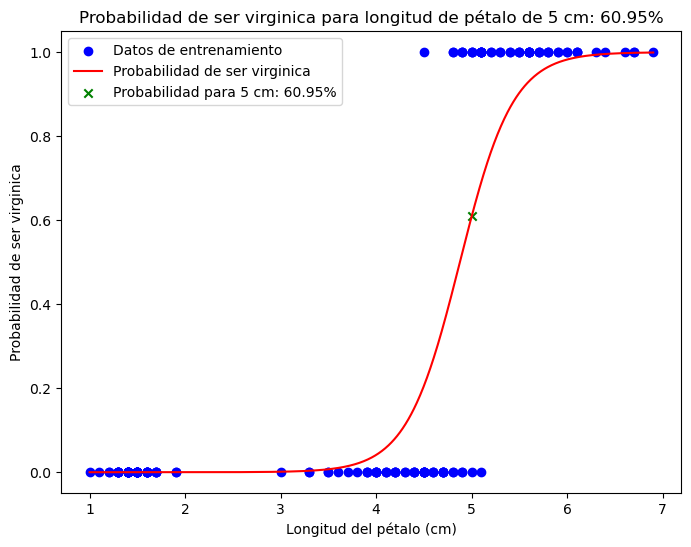

In [15]:
# Representar gráficamente el modelo y los datos de entrenamiento con matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos de entrenamiento')
plt.plot(x_sigmoide, y_sigmoide, color='red',
         label='Probabilidad de ser virginica')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Probabilidad de ser virginica')
plt.scatter(x_point, y_point, color='green', marker='x',
            label=f'Probabilidad para 5 cm: {y_point[0]*100:.2f}%')
plt.legend()
plt.title(
    f'Probabilidad de ser virginica para longitud de pétalo de 5 cm: {y_point[0]*100:.2f}%')
plt.show()

### Código Completo


documentación

[matplotlib.pyplot.scatter](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.scatter.html)

[scatter.marker ](https://matplotlib.org/3.5.3/api/markers_api.html#module-matplotlib.markers)


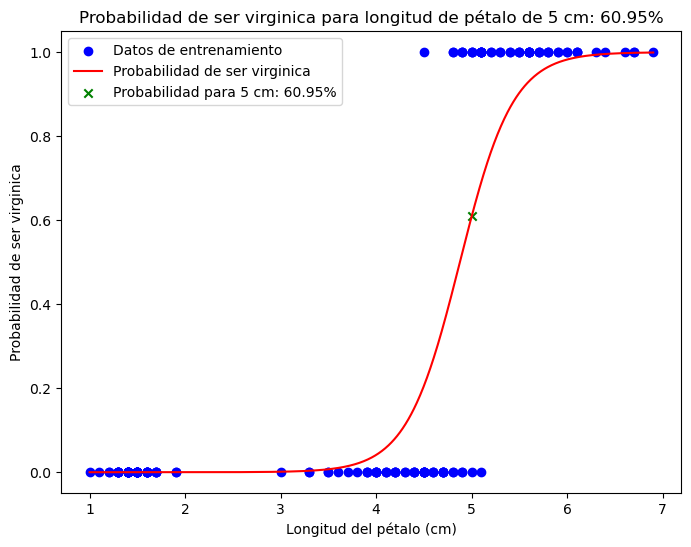

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

# Cargar el conjunto de datos de iris
iris = load_iris()

# Utilizar solo la longitud del pétalo (columna 2) como característica
# Asegurar que tengamos n filas , 1 columna , con lo cual tenemos 2 dimensiones
X = iris.data[:, 2].reshape(-1, 1)

# Definir la variable y para clasificar si una flor es de tipo virgínica (iris.target == 2) o no lo es como es binaria (0 o 1)
# Convertir a entero para clasificación binaria
y = (iris.target == 2).astype(int)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
# Cada fila de X representa una muestra de entrenamiento, y cada columna representa una característica diferente
model.fit(X, y)

# Calcular la probabilidad de ser virginica para cada punto en el rango de X
x_sigmoide = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)
y_sigmoide = model.predict_proba(x_sigmoide)[:, 1]

# Calcular la predicción del modelo para una flor con longitud de pétalo de 5 cm
x_point = np.array([[5]])
y_point = model.predict_proba(x_point)[:, 1]

# Representar gráficamente el modelo y los datos de entrenamiento con matplotlib
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos de entrenamiento')
plt.plot(x_sigmoide, y_sigmoide, color='red',
         label='Probabilidad de ser virginica')
plt.xlabel('Longitud del pétalo (cm)')
plt.ylabel('Probabilidad de ser virginica')
plt.scatter(x_point, y_point, color='green', marker='x',
            label=f'Probabilidad para 5 cm: {y_point[0]*100:.2f}%')
plt.legend()
plt.title(
    f'Probabilidad de ser virginica para longitud de pétalo de 5 cm: {y_point[0]*100:.2f}%')
plt.show()